# **Importamos las librerias necesarias:**

In [ ]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image
import pydotplus
import pandas as pd
import random
from random import seed
from random import randint

# **Llamamos a la base de datos desde GitHub:**

In [ ]:
path = "https://raw.githubusercontent.com/G4LF0/DecisionTreeForBreastCancer/main/Breast_cancer_data.csv"
df = pd.read_csv(path)
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# **Construccion del decision tree:**

In [ ]:
# 'Convertimos a lista cada columna del dataframe'
radius = df['mean_radius'].to_list()
texture =  df['mean_texture'].to_list()
perimeter = df['mean_perimeter'].to_list()
area = df['mean_area'].to_list()
smoothness = df['mean_smoothness'].to_list()
diagnosis = df['diagnosis'].to_list()

In [ ]:
# 'Creamos las funciones para retornar los valores'
def getRadius():
  return radius

def getTexture():
  return texture

def getPerimeter():
  return perimeter

def getArea():
  return area

def getSmoothness():
  return smoothness

def getDiagnosis():
  return diagnosis

In [ ]:
if __name__=="__main__":
   mean_radius = getRadius()
   mean_texture = getTexture()
   mean_perimeter = getPerimeter()
   mean_area = getArea()
   mean_smoothness = getSmoothness()
   diagnosis = getDiagnosis()
   
   labelEncoder = preprocessing.LabelEncoder()
   encodeMean_radius = labelEncoder.fit_transform(mean_radius)
   encodeMean_texture = labelEncoder.fit_transform(mean_texture)
   encodeMean_perimeter = labelEncoder.fit_transform(mean_perimeter)
   encodeMean_area = labelEncoder.fit_transform(mean_area)
   encodeMean_smoothness = labelEncoder.fit_transform(mean_smoothness)
   encodeDiagnosis = labelEncoder.fit_transform(df['diagnosis'])

features = []
for i in range(len(encodeMean_radius)):
  features.append([mean_radius[i], mean_texture[i], mean_perimeter[i], mean_area[i], mean_smoothness[i]])
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(features, diagnosis)

In [ ]:
def printTree(classifier):
    feature_names = ['mean_radius',	'mean_texture',	'mean_perimeter',	'mean_area',	'mean_smoothness']
    target_names = ['0', '1',]
    # Construccion de los datos
    dot_data = tree.export_graphviz(classifier, out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names)
    # Generar grafica
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Retornar imagen
    imagen = Image(graph.create_png())
    return imagen

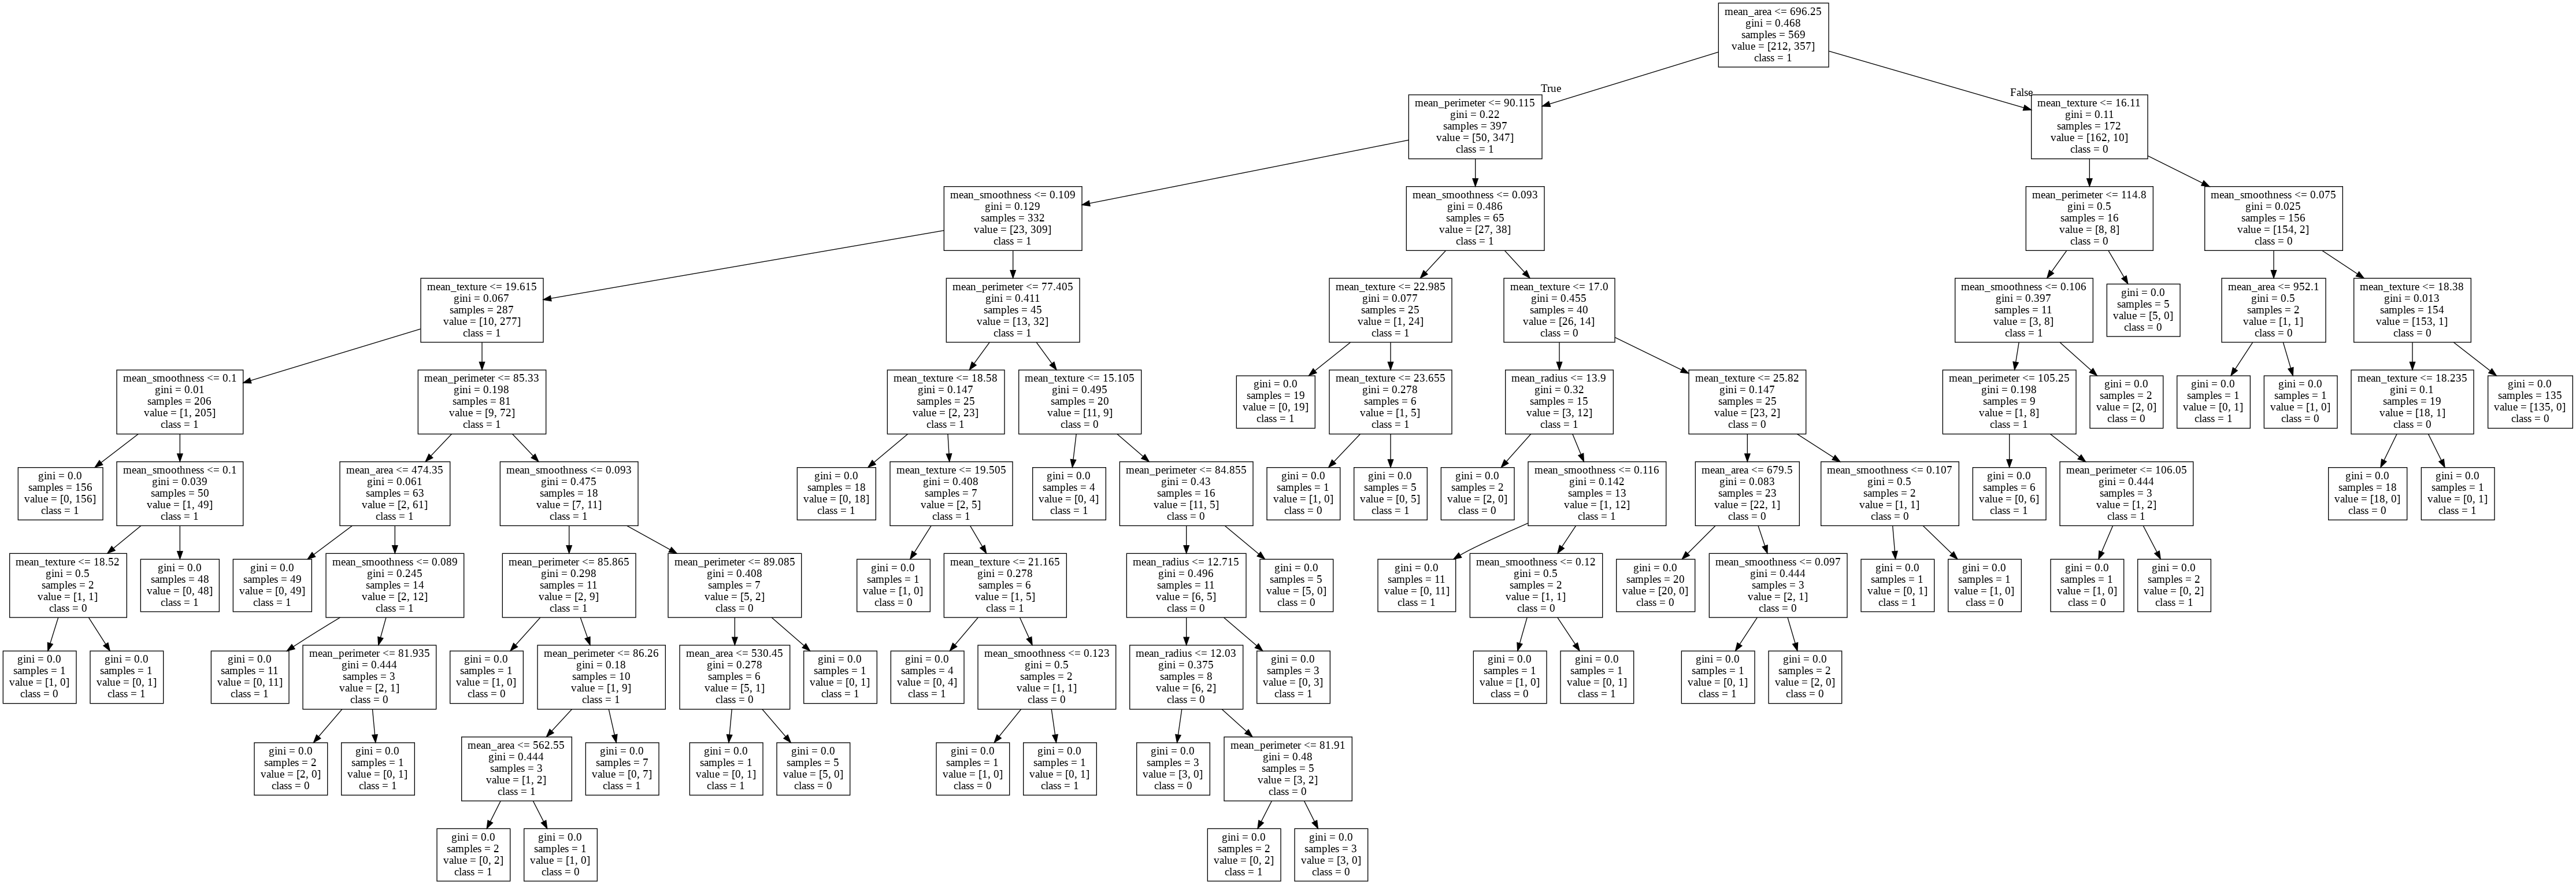

In [ ]:
printTree(classifier)